In [215]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [216]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [217]:
train = pd.read_csv('./data/credit_train.csv')
test = pd.read_csv('./data/credit_test.csv')

In [218]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [219]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [220]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [221]:
train[train['Annual Income'] > 1e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
85662,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,176132.0,Short Term,7250.0,165557393.0,10+ years,Home Mortgage,Debt Consolidation,15176.06,16.0,NaN,11.0,0.0,312778.0,669438.0,0.0,0.0


In [222]:
#This row should be dropped as it will skew the results.
train.drop(train.index[85662], inplace=True)

In [223]:
train['Loan Status'].isnull().sum()

514

In [224]:
train[train['Loan Status'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
train.drop(train.tail(514).index, inplace=True)

In [226]:
test[test['Loan ID'].isnull()==True]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
test.drop(test.tail(353).index, inplace=True)

In [228]:
train['Loan Status'].isnull().sum()

0

In [229]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) 
       
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [230]:
print(missing_values_table(train))
print(missing_values_table(test))

                              Missing Values  % of Total Values
Months since last delinquent           53140               53.1
Credit Score                           19154               19.2
Annual Income                          19154               19.2
Years in current job                    4222                4.2
Bankruptcies                             204                0.2
Tax Liens                                 10                0.0
Maximum Open Credit                        2                0.0
                              Missing Values  % of Total Values
Months since last delinquent            5306               53.1
Credit Score                            1981               19.8
Annual Income                           1981               19.8
Years in current job                     427                4.3
Bankruptcies                              22                0.2
Tax Liens                                  1                0.0


In [231]:
split = train.shape[0]
predict = train['Loan Status']
train.drop(['Loan Status'], axis=1, inplace=True)
train.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [232]:
total = pd.concat([train,test], sort=False)
total.isnull().sum()

Loan ID                             0
Customer ID                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21135
Annual Income                   21135
Years in current job             4649
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    58446
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      226
Tax Liens                          11
dtype: int64

In [233]:
#Filling NA values in Months since last delinquent with 0 since this is likely what NA means in this case.
total['Months since last delinquent'].fillna(0, inplace=True)

In [234]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2
Years in current job,4649,4.2
Bankruptcies,226,0.2
Tax Liens,11,0.0
Maximum Open Credit,2,0.0


In [235]:
#I will fill Bankruptcies and Tax Liens with 0 as well since they are binary variable.
total['Bankruptcies'].fillna(0, inplace=True)
total['Tax Liens'].fillna(0, inplace=True)

In [236]:
total['Maximum Open Credit'].fillna(total['Maximum Open Credit'].mean(), inplace=True)

In [237]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2
Years in current job,4649,4.2


In [238]:
total.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.099990e+05,88864.000000,8.886400e+04,109999.000000,109999.000000,109999.000000,109999.000000,109999.000000,1.099990e+05,1.099990e+05,109999.000000,109999.000000
mean,1.174631e+07,1076.525173,1.375601e+06,18468.556755,18.202505,16.359831,11.124492,0.168056,2.942820e+05,7.541020e+05,0.117374,0.029446
std,3.176729e+07,1475.444874,9.102755e+05,12195.615786,7.015604,23.011974,5.011116,0.484391,3.772790e+05,8.013966e+06,0.350971,0.261043
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795970e+05,705.000000,8.488440e+05,10211.930000,13.500000,0.000000,8.000000,0.000000,1.121950e+05,2.731630e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173440e+06,16202.630000,16.900000,0.000000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.665000,21.700000,30.000000,14.000000,0.000000,3.674885e+05,7.831890e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.647544e+07,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [239]:
#max of Credit Score is scaled by a power of 10, we need to scale them back
total['Credit Score'] = total['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

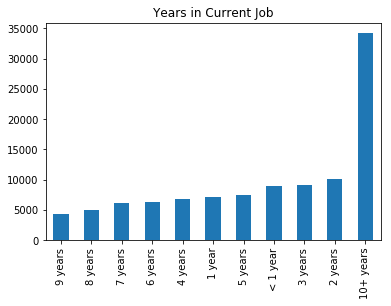

In [240]:
%matplotlib inline
total['Years in current job'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Years in Current Job')

In [241]:
#impute missing values in Years... with 10+ years
total['Years in current job'].fillna('10+ years', inplace=True)

In [242]:
missing_values_table(total)

,Missing Values,% of Total Values
Credit Score,21135,19.2
Annual Income,21135,19.2


In [243]:
#It looks like Credit Score and Annual Income NA values are related.
total[total['Credit Score'].isna() == True]

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
11,fa096848-6143-4907-b2cf-852a0b06171c,aa0a6a22-a95e-48e0-ba4f-b83456d424e4,541970.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,0.0,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,7cbaa3fa-16fd-4343-9bcb-e90b34a1072f,3ec886e7-f15d-4c35-83d0-bdec4817ae4b,449020.0,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,0.0,8.0,0.0,334533.0,428956.0,0.0,0.0
16,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,653004.0,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,0.0,9.0,0.0,302309.0,413754.0,0.0,0.0
18,c6be21f0-80b1-46b3-8019-16646fd2137d,c67b2cb5-9f91-4bcb-9a03-03d1589c6c1a,66396.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,9898.81,27.1,0.0,23.0,1.0,9728.0,402380.0,1.0,0.0
29,dcf093ca-d26b-4853-9679-aa0c7ebe05a7,5129cffc-68a1-4dd9-8bfe-035f3478d6dd,107404.0,Short Term,NaN,NaN,10+ years,Home Mortgage,other,19238.07,43.7,0.0,5.0,0.0,28956.0,58014.0,0.0,0.0
34,83ad0662-ef2d-4732-99ff-e9cdab4eb276,2d53b50a-30a2-488e-a287-3780b26e62ba,109318.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Buy a Car,15524.90,22.7,0.0,9.0,0.0,77121.0,920524.0,0.0,0.0
38,03e3a77a-fa93-489c-b7b3-c06196ba3bce,dedbd71d-dabd-4c64-a38f-bb5886e7f8b6,259842.0,Short Term,NaN,NaN,8 years,Home Mortgage,Debt Consolidation,11792.73,20.6,34.0,9.0,0.0,401584.0,708818.0,0.0,0.0


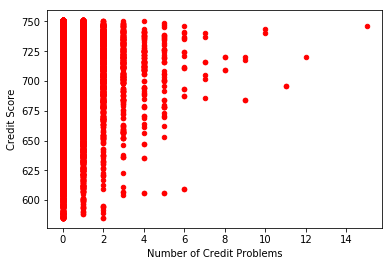

In [244]:
total.plot(kind='scatter', x='Number of Credit Problems', y='Credit Score', color='Red')

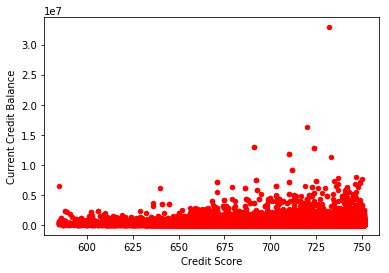

In [245]:
total.plot(kind='scatter', x='Credit Score', y='Current Credit Balance', color='Red')

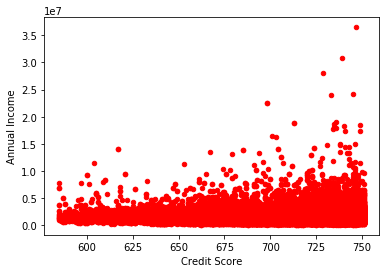

In [246]:
total.plot(kind='scatter', x='Credit Score', y='Annual Income', color='Red')

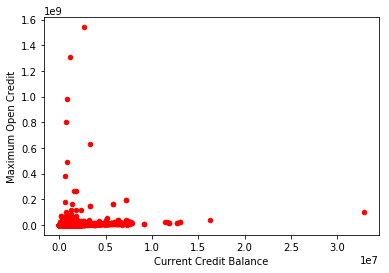

In [247]:
total.plot(kind='scatter', x='Current Credit Balance', y='Maximum Open Credit', color='Red')

In [248]:
total.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

[Text(0, 0, '-0.99'),
 Text(0, 0, '0.00'),
 Text(0, 0, '147.41'),
 Text(0, 0, '22025.47'),
 Text(0, 0, '3269016.37'),
 Text(0, 0, '485165194.41'),
 Text(0, 0, '72004899336.39')]

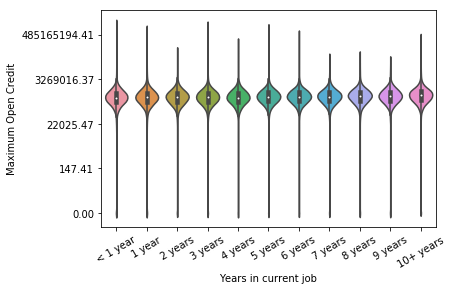

In [249]:
import seaborn as sns
import numpy as np
v = sns.violinplot(x=total['Years in current job'], y=np.log1p(total['Maximum Open Credit']), order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
v.set_xticklabels(v.get_xticklabels(), rotation=30)
v.set_yticklabels([f'{np.expm1(l):.2f}' for l in v.get_yticks()])

[Text(0, 0, '< 1 year'),
 Text(0, 0, '1 year'),
 Text(0, 0, '2 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '4 years'),
 Text(0, 0, '5 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '8 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '10+ years')]

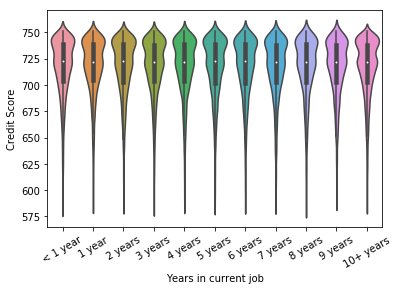

In [250]:
v = sns.violinplot(x=total['Years in current job'], y=total['Credit Score'], order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
v.set_xticklabels(v.get_xticklabels(), rotation=30)

[Text(0, 0, '22025.47'),
 Text(0, 0, '59873.14'),
 Text(0, 0, '162753.79'),
 Text(0, 0, '442412.39'),
 Text(0, 0, '1202603.28'),
 Text(0, 0, '3269016.37'),
 Text(0, 0, '8886109.52'),
 Text(0, 0, '24154951.75'),
 Text(0, 0, '65659968.14')]

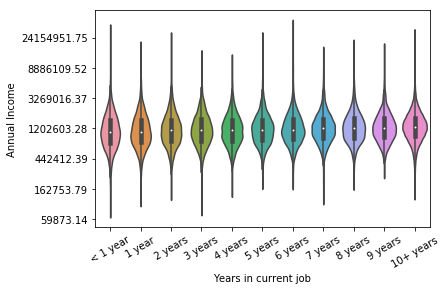

In [251]:
v = sns.violinplot(x=total['Years in current job'], y=np.log1p(total['Annual Income']), order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
v.set_xticklabels(v.get_xticklabels(), rotation=30)
v.set_yticklabels([f'{np.expm1(l):.2f}' for l in v.get_yticks()])

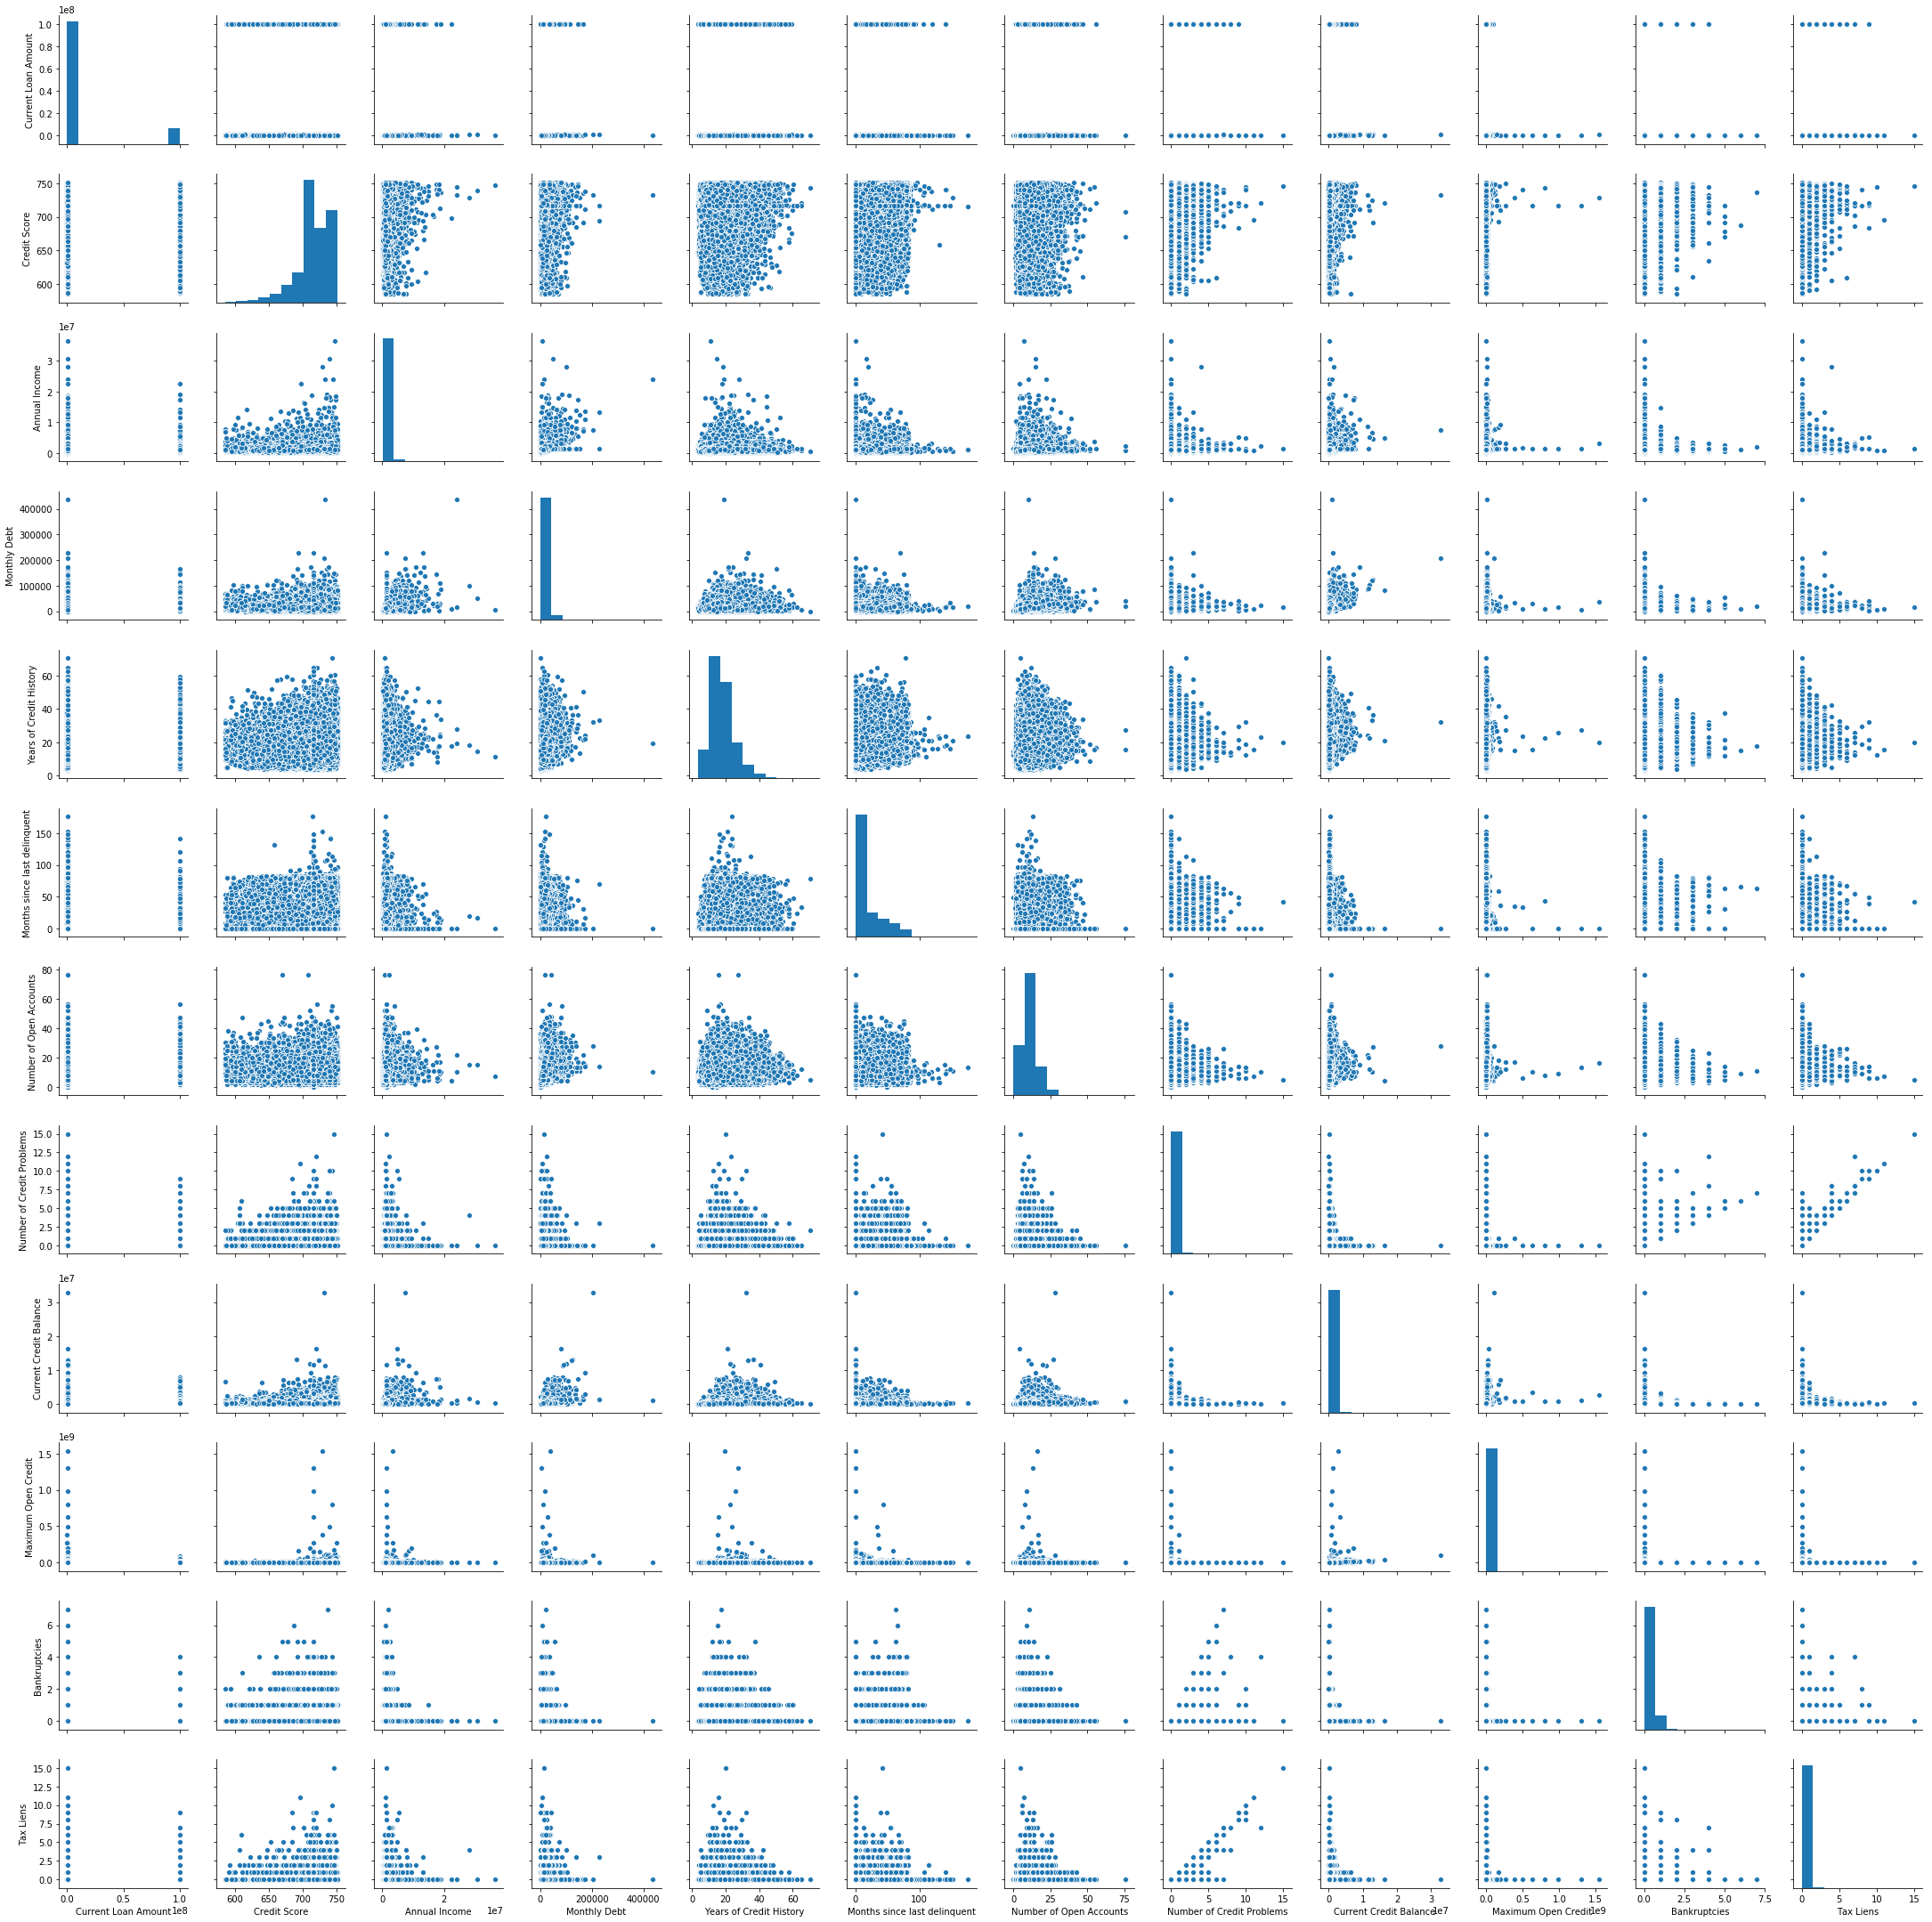

In [40]:
sns.pairplot(total)

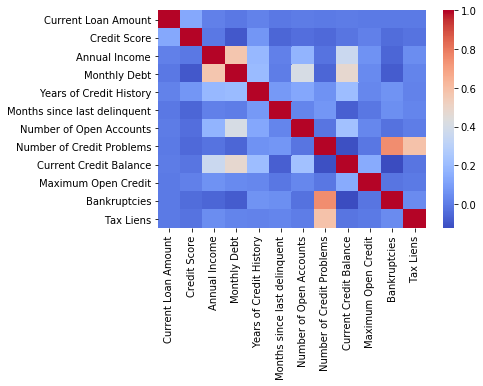

In [252]:
sns.heatmap(total.corr(), cmap="coolwarm")

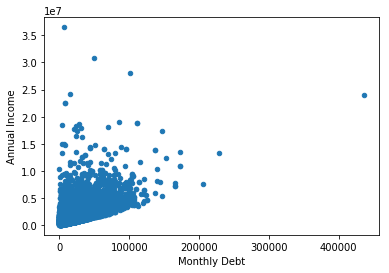

In [253]:
total.plot(kind='scatter', x='Monthly Debt', y='Annual Income')

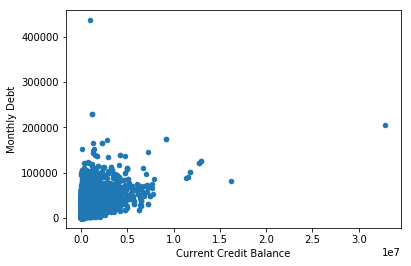

In [254]:
total.plot(kind='scatter', x='Current Credit Balance', y='Monthly Debt')

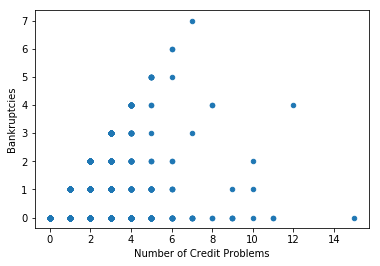

In [255]:
total.plot(kind='scatter', x='Number of Credit Problems', y='Bankruptcies')

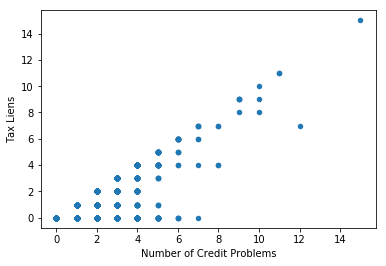

In [256]:
total.plot(kind='scatter', x='Number of Credit Problems', y='Tax Liens')

In [ ]:
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#clusters = 3
#while clusters < 20:
#    k = KMeans(n_clusters = clusters, n_jobs = -1)
#    preds = k.fit_predict(total.values)
#    sil = silhouette_score(total, preds)
#    print(clusters, sil)
#    clusters +=1
# ------------------------K means silhouette score = 6 --------------------------------------

3 0.9876756844785407
4 0.9879465773152777
5 0.9880175747634249
6 0.9880190186982498
7 0.9493170511598221
8 0.8933960102741022
9 0.900405790177196
10 0.6099695316825525
11 0.5997528402138775
12 0.5875247736003869
13 0.5898485948489571
14 0.6117330794434845


In [257]:
#For now we will impute the mean. What would be better is imputing the mean over a set of K-means clusters, determined by silouhette score.
from sklearn.cluster import KMeans
total.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)
total = MultiColumnLabelEncoder(columns=['Term','Years in current job', 'Home Ownership', 'Purpose']).fit_transform(total)
#column numbers: 1, 4, 5, 6
totalNA = total
print(totalNA.shape)
total['Credit Score'].fillna(total['Credit Score'].mean(), inplace=True)
total['Annual Income'].fillna(total['Annual Income'].mean(), inplace=True)
k = KMeans(n_clusters=6, n_jobs=-1)
print(total.shape)
k_means = k.fit_predict(total)
k_df = pd.DataFrame.from_dict({"k_means": k_means})
print(k_df.shape)

(109999, 16)
(109999, 16)
(109999, 1)


In [258]:
totalNA = totalNA.join(k_df)
totalNA["Credit Score"] = totalNA.groupby("k_means")["Credit Score"].transform(lambda x: x.fillna(x.median()))

totalNA["Annual Income"] = totalNA.groupby("k_means")["Annual Income"].transform(lambda x: x.fillna(x.median()))

In [259]:
total = totalNA

In [260]:
total.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,k_means
0,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0
0,611314.0,1,747.000000,2.074116e+06,1,1,3,42000.83,21.8,0.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0
1,262328.0,1,716.323832,1.375601e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
1,266662.0,1,734.000000,1.919190e+06,1,1,3,36624.40,19.4,0.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0
2,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1


In [139]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(3)
#total = poly.fit_transform(total)

In [140]:
#from sklearn.decomposition import PCA
#pca = PCA(10)
#total = pca.fit_transform(total)

In [261]:
train = total[:split]
test = total[split:]

In [262]:
train

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,k_means
0,445412.0,1,709.000000,1.167493e+06,8,1,5,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0
0,611314.0,1,747.000000,2.074116e+06,1,1,3,42000.83,21.8,0.0,9.0,0.0,621908.0,1058970.0,0.0,0.0,0
1,262328.0,1,716.323832,1.375601e+06,1,1,3,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
1,266662.0,1,734.000000,1.919190e+06,1,1,3,36624.40,19.4,0.0,11.0,0.0,679573.0,904442.0,0.0,0.0,0
2,99999999.0,1,741.000000,2.231892e+06,8,2,3,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1
2,153494.0,1,709.000000,8.711120e+05,2,3,3,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,1
3,347666.0,0,721.000000,8.069490e+05,3,2,3,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0
3,176242.0,1,727.000000,7.800830e+05,1,3,3,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,0
4,176220.0,1,716.323832,1.375601e+06,5,3,3,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0
4,321992.0,1,744.000000,1.761148e+06,1,1,3,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0


In [263]:
y = predict.replace(to_replace=['Fully Paid', 'Charged Off'], value=[0,1])

In [264]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [271]:
param_grid = {
    #'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': ['gbdt', 'dart'], # traditional gradient boosting decision tree
    #'num_iterations': 500, 
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'num_leaves': [6, 14, 31, 64],
    #'device': 'gpu', # you can use GPU to achieve faster learning
    #'max_depth': -1, # <0 means no limit
    #'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'reg_alpha': [0, 1e-1, 2, 7, 25, 100], # L1 regularization
    'reg_lambda': [0, 1e-1, 2, 7, 25, 100], # L2 regularization
    #'metric' : 'roc_auc',
    #'subsample_for_bin': [1e5, 2e5, 3e5], # number of samples for constructing bins
    'subsample': [0.3, 0.6, 0.8], # subsample ratio of the training instance
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8], # subsample ratio of columns when constructing the tree
    'min_split_gain': [0.0, 0.1, 0.01], # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': [1e-4, 1e-3, 1e-2, 1e-1], # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': [5, 20, 50],# minimum number of data needed in a leaf
    'importance_type': ['split', 'gain']
}

params = {
    "n_estimators": 1000,
    "n_jobs": -1,
    "silent": True,
    "max_depth": -1,
    "subsample_freq": 1,
    "is_unbalance": True,
    "objective": "binary"
}
# Initiate classifier to use
mdl = lgb.LGBMClassifier(
          n_estimators = 1000,
          n_jobs = -1, 
          silent = True,
          max_depth = -1,
          subsample_freq=1,
          is_unbalance=True,
          categorical_feature=[1, 4, 5, 6, 16]
        )


In [47]:
grid = GridSearchCV(mdl, param_grid, verbose=1, cv=3, scoring='roc_auc', n_jobs=-1)

In [48]:
grid.fit(train, y)

Fitting 3 folds for each of 995328 candidates, totalling 2985984 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [274]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

In [276]:
ds = lgb.Dataset(X_train, y_train, categorical_feature=[1, 4, 5, 6, 16])

mdl = lgb.train(params, ds)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


In [167]:
pred = mdl.predict(X_test)

In [168]:
def scoring(pred, y):
    roc = roc_auc_score(pred, y)
    print("ROC AUC Score:", roc)
    acc = accuracy_score(pred, y)
    print("Accuracy Score:", acc)
    conf = confusion_matrix(pred, y)
    print("Confusion Matrix:")
    print(conf)

In [169]:
scoring(pred, y_test)

ROC AUC Score: 0.5014898307438234
Accuracy Score: 0.5997878787878788
Confusion Matrix:
[[17383  5048]
 [ 8159  2410]]


In [170]:
import xgboost as xgb

In [171]:
clf_xgb = xgb.XGBClassifier(n_jobs=1000, nthreads=-1, scale_pos_weight = 3.4)

In [173]:
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)
scoring(pred, y_test)

ROC AUC Score: 0.5007960091555523
Accuracy Score: 0.542060606060606
Confusion Matrix:
[[14708  4278]
 [10834  3180]]


In [175]:
import catboost as cat

In [176]:
clf_cat = cat.CatBoostClassifier(iterations=1000, scale_pos_weight=3.4, eval_metric="AUC", early_stopping_rounds=10, cat_features=[1, 4, 5, 6, 16])

In [177]:
clf_cat.fit(X_train, y_train)

Learning rate set to 0.055068
0:	total: 76.6ms	remaining: 1m 16s
1:	total: 94.4ms	remaining: 47.1s
2:	total: 108ms	remaining: 35.9s
3:	total: 120ms	remaining: 30s
4:	total: 132ms	remaining: 26.3s
5:	total: 144ms	remaining: 23.8s
6:	total: 156ms	remaining: 22.2s
7:	total: 168ms	remaining: 20.9s
8:	total: 180ms	remaining: 19.9s
9:	total: 192ms	remaining: 19s
10:	total: 213ms	remaining: 19.2s
11:	total: 233ms	remaining: 19.2s
12:	total: 244ms	remaining: 18.5s
13:	total: 256ms	remaining: 18s
14:	total: 268ms	remaining: 17.6s
15:	total: 280ms	remaining: 17.2s
16:	total: 291ms	remaining: 16.8s
17:	total: 303ms	remaining: 16.5s
18:	total: 315ms	remaining: 16.3s
19:	total: 327ms	remaining: 16s
20:	total: 339ms	remaining: 15.8s
21:	total: 350ms	remaining: 15.6s
22:	total: 362ms	remaining: 15.4s
23:	total: 374ms	remaining: 15.2s
24:	total: 386ms	remaining: 15s
25:	total: 398ms	remaining: 14.9s
26:	total: 410ms	remaining: 14.8s
27:	total: 424ms	remaining: 14.7s
28:	total: 446ms	remaining: 14.9s
2

241:	total: 3.15s	remaining: 9.88s
242:	total: 3.17s	remaining: 9.87s
243:	total: 3.18s	remaining: 9.85s
244:	total: 3.19s	remaining: 9.84s
245:	total: 3.2s	remaining: 9.82s
246:	total: 3.22s	remaining: 9.8s
247:	total: 3.23s	remaining: 9.79s
248:	total: 3.24s	remaining: 9.77s
249:	total: 3.25s	remaining: 9.75s
250:	total: 3.26s	remaining: 9.74s
251:	total: 3.27s	remaining: 9.72s
252:	total: 3.29s	remaining: 9.71s
253:	total: 3.3s	remaining: 9.69s
254:	total: 3.31s	remaining: 9.68s
255:	total: 3.32s	remaining: 9.66s
256:	total: 3.34s	remaining: 9.64s
257:	total: 3.35s	remaining: 9.63s
258:	total: 3.36s	remaining: 9.62s
259:	total: 3.38s	remaining: 9.61s
260:	total: 3.39s	remaining: 9.6s
261:	total: 3.4s	remaining: 9.58s
262:	total: 3.41s	remaining: 9.56s
263:	total: 3.42s	remaining: 9.55s
264:	total: 3.44s	remaining: 9.53s
265:	total: 3.45s	remaining: 9.52s
266:	total: 3.46s	remaining: 9.5s
267:	total: 3.47s	remaining: 9.49s
268:	total: 3.48s	remaining: 9.47s
269:	total: 3.5s	remaining

478:	total: 6.54s	remaining: 7.12s
479:	total: 6.56s	remaining: 7.11s
480:	total: 6.58s	remaining: 7.1s
481:	total: 6.6s	remaining: 7.09s
482:	total: 6.62s	remaining: 7.08s
483:	total: 6.63s	remaining: 7.07s
484:	total: 6.65s	remaining: 7.06s
485:	total: 6.67s	remaining: 7.05s
486:	total: 6.69s	remaining: 7.05s
487:	total: 6.71s	remaining: 7.04s
488:	total: 6.73s	remaining: 7.03s
489:	total: 6.74s	remaining: 7.02s
490:	total: 6.76s	remaining: 7s
491:	total: 6.77s	remaining: 6.99s
492:	total: 6.79s	remaining: 6.98s
493:	total: 6.8s	remaining: 6.97s
494:	total: 6.82s	remaining: 6.95s
495:	total: 6.83s	remaining: 6.94s
496:	total: 6.84s	remaining: 6.93s
497:	total: 6.86s	remaining: 6.91s
498:	total: 6.87s	remaining: 6.9s
499:	total: 6.88s	remaining: 6.88s
500:	total: 6.89s	remaining: 6.87s
501:	total: 6.91s	remaining: 6.85s
502:	total: 6.92s	remaining: 6.84s
503:	total: 6.93s	remaining: 6.82s
504:	total: 6.95s	remaining: 6.81s
505:	total: 6.96s	remaining: 6.8s
506:	total: 6.98s	remaining:

719:	total: 10.4s	remaining: 4.03s
720:	total: 10.4s	remaining: 4.01s
721:	total: 10.4s	remaining: 4.01s
722:	total: 10.4s	remaining: 4s
723:	total: 10.5s	remaining: 3.98s
724:	total: 10.5s	remaining: 3.98s
725:	total: 10.5s	remaining: 3.97s
726:	total: 10.5s	remaining: 3.96s
727:	total: 10.6s	remaining: 3.95s
728:	total: 10.6s	remaining: 3.94s
729:	total: 10.6s	remaining: 3.93s
730:	total: 10.7s	remaining: 3.92s
731:	total: 10.7s	remaining: 3.91s
732:	total: 10.7s	remaining: 3.9s
733:	total: 10.7s	remaining: 3.88s
734:	total: 10.7s	remaining: 3.87s
735:	total: 10.7s	remaining: 3.85s
736:	total: 10.8s	remaining: 3.84s
737:	total: 10.8s	remaining: 3.83s
738:	total: 10.8s	remaining: 3.81s
739:	total: 10.8s	remaining: 3.8s
740:	total: 10.8s	remaining: 3.79s
741:	total: 10.9s	remaining: 3.77s
742:	total: 10.9s	remaining: 3.76s
743:	total: 10.9s	remaining: 3.74s
744:	total: 10.9s	remaining: 3.73s
745:	total: 10.9s	remaining: 3.71s
746:	total: 10.9s	remaining: 3.7s
747:	total: 10.9s	remainin

961:	total: 14.6s	remaining: 577ms
962:	total: 14.6s	remaining: 562ms
963:	total: 14.6s	remaining: 547ms
964:	total: 14.7s	remaining: 532ms
965:	total: 14.7s	remaining: 517ms
966:	total: 14.7s	remaining: 502ms
967:	total: 14.7s	remaining: 486ms
968:	total: 14.7s	remaining: 471ms
969:	total: 14.8s	remaining: 456ms
970:	total: 14.8s	remaining: 441ms
971:	total: 14.8s	remaining: 426ms
972:	total: 14.8s	remaining: 411ms
973:	total: 14.8s	remaining: 396ms
974:	total: 14.8s	remaining: 381ms
975:	total: 14.9s	remaining: 366ms
976:	total: 14.9s	remaining: 350ms
977:	total: 14.9s	remaining: 335ms
978:	total: 14.9s	remaining: 320ms
979:	total: 14.9s	remaining: 305ms
980:	total: 15s	remaining: 290ms
981:	total: 15s	remaining: 275ms
982:	total: 15s	remaining: 260ms
983:	total: 15s	remaining: 244ms
984:	total: 15.1s	remaining: 229ms
985:	total: 15.1s	remaining: 214ms
986:	total: 15.1s	remaining: 199ms
987:	total: 15.1s	remaining: 184ms
988:	total: 15.1s	remaining: 168ms
989:	total: 15.1s	remaining:

In [178]:
preds = clf_cat.predict(X_test)
scoring(preds, y_test)

ROC AUC Score: 0.5015323352032276
Accuracy Score: 0.5444545454545454
Confusion Matrix:
[[14798  4289]
 [10744  3169]]


In [117]:
param_grid = {
    'eta': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [0, 1, 2, 3, 5, 7, 50, 100],
    #'subsample': [0.5, 0.6, 0.7, 0.8],
    'depth': [4, 8, 16],
    #'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'rsm': [0.4, 0.6, 0.8]
}
grid = GridSearchCV(clf_cat, param_grid, verbose=1, cv=3, scoring='roc_auc', n_jobs=-1)

In [118]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 33.3min
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 152.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 426.3min
exception calling callback for <Future at 0x7f66d5a442b0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/usr/lo

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}